# Hierarchical Clustering for Customer Data

<img align="top"  width="700" height="300" src="https://cdn.educba.com/academy/wp-content/uploads/2019/11/Hierarchical-Clustering-Analysis.png">

# Hierarchical Clustering for Customer Data

## Clustering
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

## Hierarchical Clustering
Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

## About the dataset
This input file contains the basic information (ID, age, gender, income, spending score) about the customers of a mall. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

# IMPORTING LIBRARIES

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

## LOADING DATASET

In [104]:
data= pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## DATA INSIGHT

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [87]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [88]:
data.shape

(200, 5)

In [89]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## NULL VALUE

In [90]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# DATA VISUALIZATION

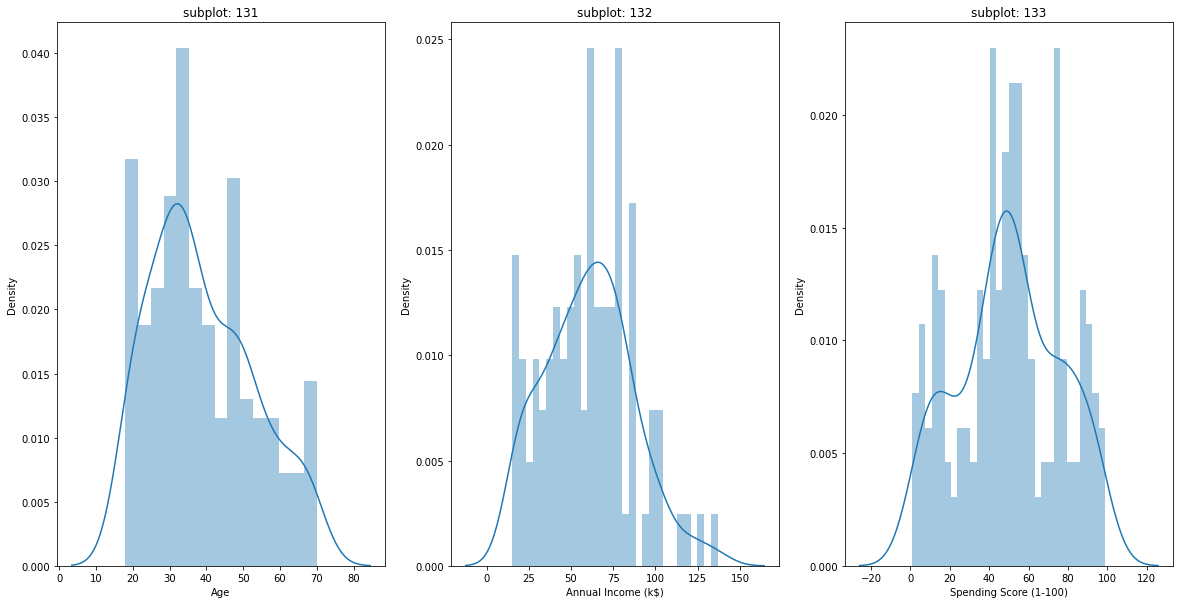

In [91]:
fig = plt.figure(figsize=(20,10))
plt.subplot(131)
sns.distplot(data["Age"],bins=15)
plt.title('subplot: 131')

plt.subplot(132)
plt.title('subplot: 132')
sns.distplot(data["Annual Income (k$)"],kde=True,bins=30)

plt.subplot(133)
plt.title('subplot: 133')
sns.distplot(data["Spending Score (1-100)"],kde=True,bins=30)
plt.show()

# CHECKING OUTLIEARS 

Text(0.5, 1.0, 'ANNUAL INCOME')

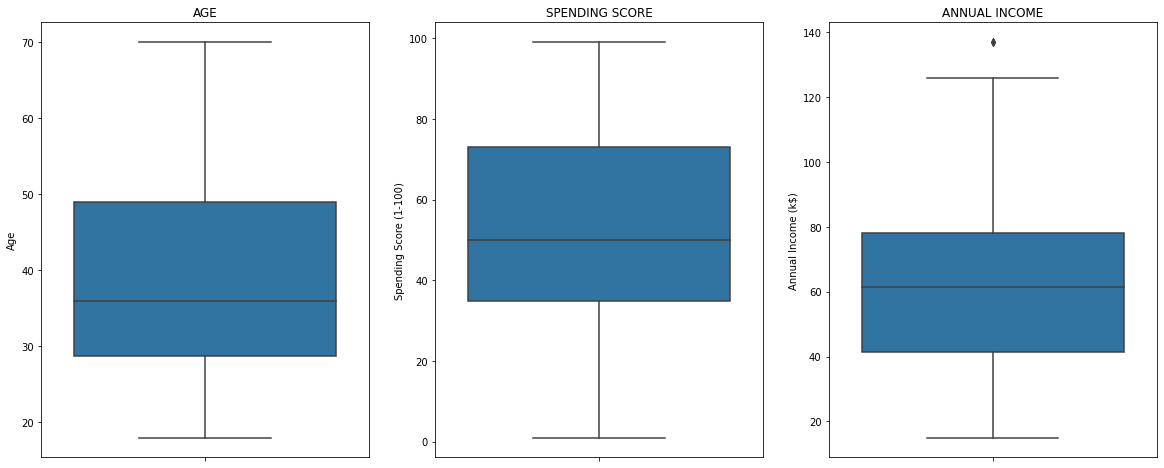

In [92]:
plt.figure(figsize = (20,8))
plt.subplot(131)
sns.boxplot(data = data, y="Age")
plt.title("AGE")

plt.subplot(132)
sns.boxplot(data = data, y=data["Spending Score (1-100)"])
plt.title("SPENDING SCORE")

plt.subplot(133)
sns.boxplot(data = data, y=data["Annual Income (k$)"])
plt.title("ANNUAL INCOME")

##  HANDLING CATAGRICAL COLUMN

In [93]:
Label_encoding =  preprocessing.LabelEncoder()
data['Gender'] = Label_encoding.fit_transform(data['Gender'])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [94]:
data.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


## HEAT MAP

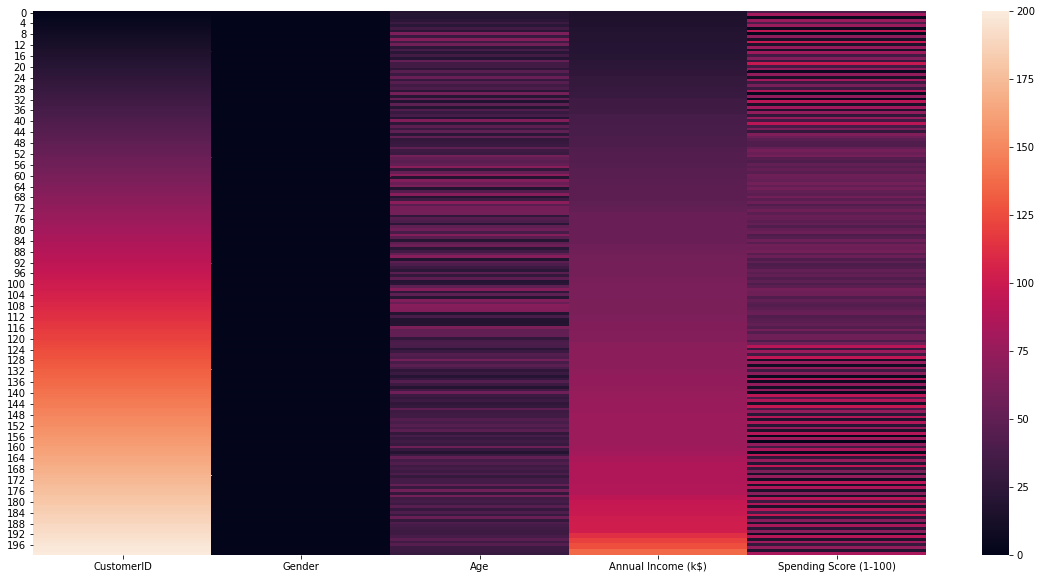

In [95]:
plt.figure(figsize =(20,10))
sns.heatmap(data)
plt.show()

## DENDROGRAM

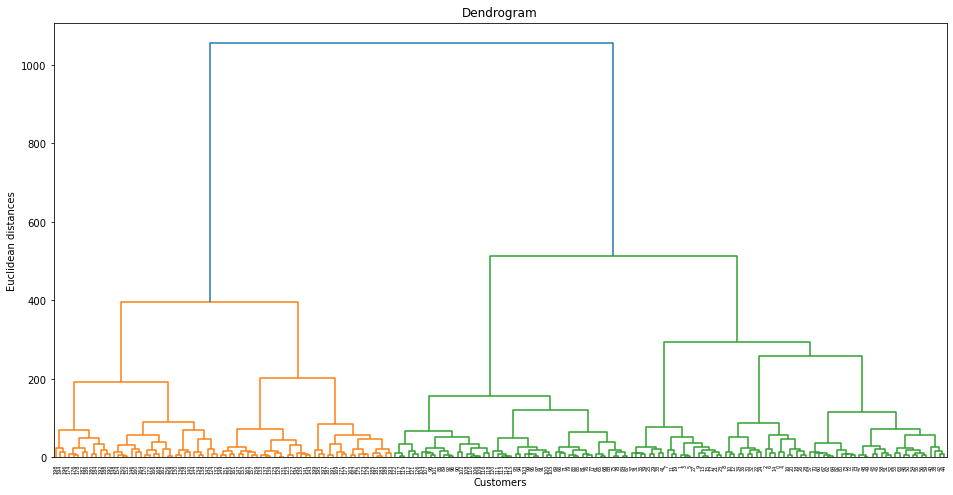

In [96]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## K VALUES

In [97]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    
    hc = AgglomerativeClustering(n_clusters =num_clusters , affinity = 'euclidean', linkage ='average')
    hc.fit_predict(data)
    cluster_labels = hc.labels_
    
    
    # silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.46849631166096345
For n_clusters=3, the silhouette score is 0.38203431755157413
For n_clusters=4, the silhouette score is 0.4159443831280116
For n_clusters=5, the silhouette score is 0.4438365108161371
For n_clusters=6, the silhouette score is 0.4045772099875017
For n_clusters=7, the silhouette score is 0.39528132563083274
For n_clusters=8, the silhouette score is 0.3732686867785951


In [98]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(data)
y_hc

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [99]:
data['cluster'] = pd.DataFrame(y_hc)

In [100]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3


## VISUALIZATION OF CLUSTER

In [101]:
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = data['cluster'], 
        size= 15,
        line=dict(
            color= data['cluster'],
            width= 10
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [109]:
data['cluster'] = pd.DataFrame(y_hc)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


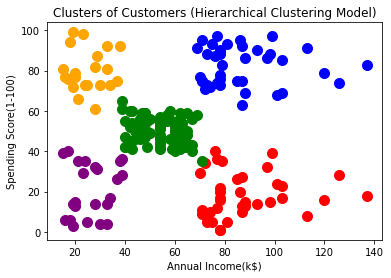

In [110]:
X = data.iloc[:, [3,4]].values
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

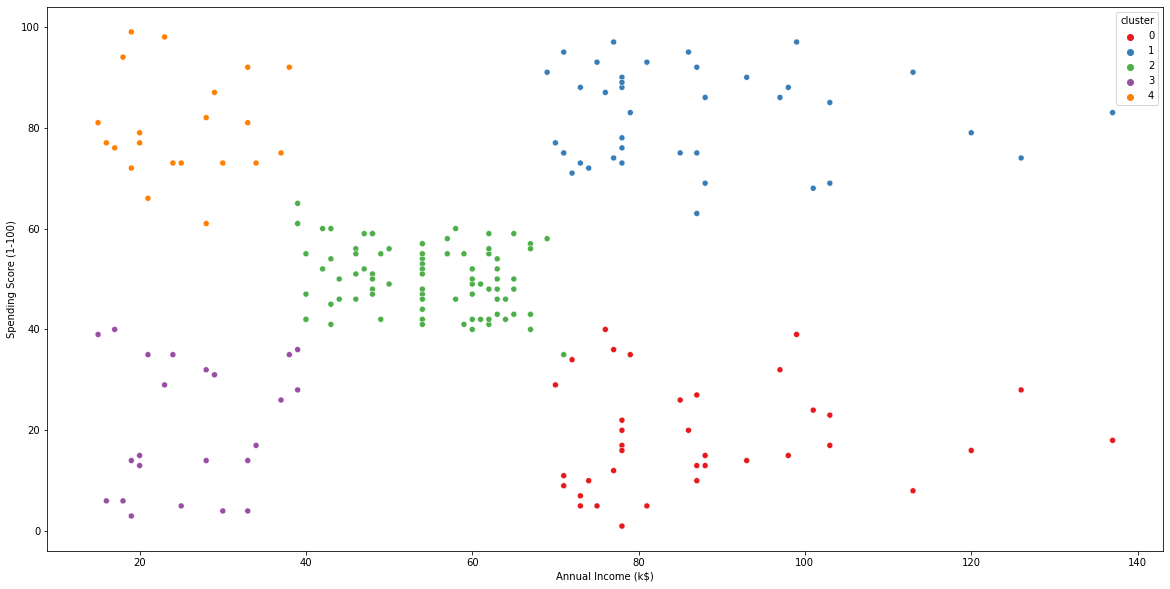

In [112]:
plt.figure(figsize =(20,10))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',hue='cluster',data = data,legend='full',palette="Set1")
plt.show()

# Final Note

__Thus, we have analysed Customer data and performed Hierarchical Clustering using Agglomerative Clustering Algorithm. This kind of cluster analysis helps design better customer acquisition strategies and helps in business growth. Let me know your feedback for this notebook, happy coding :)__

# THE END !!